In [1]:
import os
import sys
import numpy as np
import healpy as hp
import lenspyx
import multiprocessing as mp
import argparse


sys.path.insert(0, './')
#from one import *
from utils import cli

/sharefs/alicpt/users/chenwz/anaconda3/envs/lens/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
nlev = 6.3  # uK-arcmin

nside=2048

In [57]:
npix = hp.nside2npix(nside)
uKamin2uKpix = lambda n, npix : n / np.sqrt((360 * 60) ** 2 / np.pi / npix)  # 1° = pi/180 rad, 1' (arcmin) = pi/180/60 rad, 见PLANCK2015 (A.7)
uKpix2uKamin = lambda n, npix : n * np.sqrt((360 * 60) ** 2 / np.pi / npix)
noise_pix = uKamin2uKpix(nlev, npix)  #muK-pix

In [59]:
noise_pix

3.667602921280215

In [5]:
nrms = hp.read_map("/sharefs/alicpt/users/chenwz/reconstruction_1024_LAT/mask/48/I_NOISE_150_C_1024.fits",field = (0,))

In [61]:
nrms_unity = nrms * cli(nrms)
nrms_unity = hp.ud_grade(nrms_unity, nside_out = nside)

nrms_rescale = noise_pix * nrms_unity

In [44]:
#hp.write_map("I_noise_Simons_2048.fits",nrms_rescale,overwrite=True)

setting the output map dtype to [dtype('float32')]


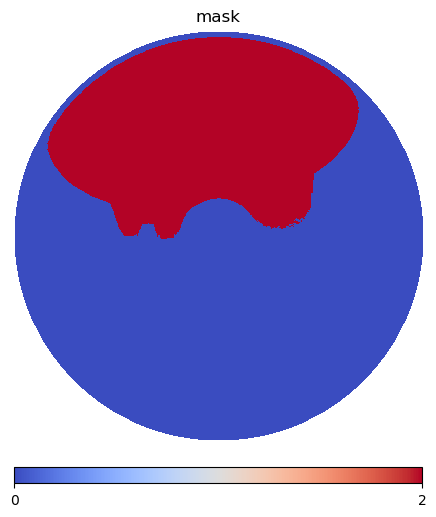

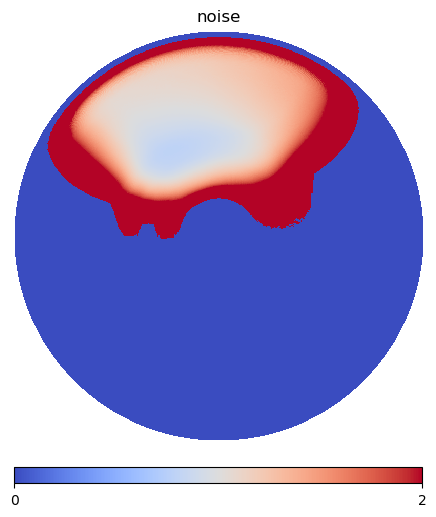

In [62]:
hp.orthview(nrms_rescale, title='mask', coord=['G'], half_sky=True, rot=[0, 90], min=0, max=2,  cmap='coolwarm', notext=True)
hp.orthview(nrms, title='noise', coord=['G'], half_sky=True, rot=[0, 90], min=0, max=2,  cmap='coolwarm', notext=True)

In [12]:
noise_pix

3.667602921280215